# Telecom Customer Churn Prediction: Case Study Problem Statement

## Introduction

The telecom industry is highly competitive, and customer churn is a significant concern. Retaining existing customers is often more cost-effective than acquiring new ones. This case study aims to build a predictive model to identify customers who are likely to churn, allowing the company to take proactive measures to retain them.

# Objective

The primary objective is to develop a machine learning model that can predict customer churn with high accuracy. The model will use historical data to identify patterns or characteristics of customers who have churned in the past.

## Data

Two datasets are provided:

1. `train.csv`: This dataset contains historical data, including whether or not a customer has churned. Features include customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, and Churn.

2. `active_customers.csv`: This dataset contains data for active customers without the 'Churn' label. The objective is to predict the likelihood of these active customers churning in the near future.

# Data Exploration

1. Perform initial data exploration to understand the data types, missing values, and summary statistics.
2. Visualize the data to identify patterns and correlations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
# df as dataframe

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626,0.265430
std,0.368541,24.627623,30.171934,0.441604
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.450000,0.000000
50%,0.000000,29.000000,70.500000,0.000000
75%,0.000000,55.750000,89.987500,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [6]:
# we'll be changing the data of churn into Yes and No, because essentially its a boolean data
df['Churn']=df['Churn'].replace({0:'No',1:'Yes'})

In [7]:
# we'll be changing the data of senior citizen into Yes and No, because essentially its a boolean data
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [8]:
df.describe()

,tenure,MonthlyCharges
count,5282.000000,5282.000000
mean,32.362931,64.856626
std,24.627623,30.171934
min,0.000000,18.400000
25%,9.000000,35.450000
50%,29.000000,70.500000
75%,55.750000,89.987500
max,72.000000,118.750000


### Data Preprocessing

1. Handle missing values if any.
2. Convert categorical variables into numerical form.
3. Normalize/Standardize numerical features if necessary.

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73457
Yes    0.26543
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

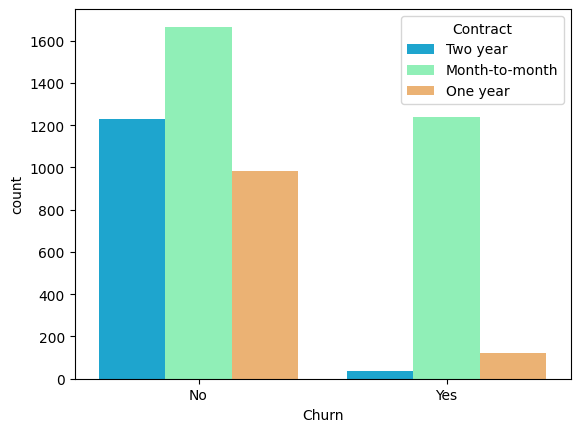

In [11]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='Contract', legend=True)
#legend=False removes the legend and hue is used to define subgroups based on another categorical variable

In [12]:
df[['Contract','Churn']].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.315411
                Yes      0.234949
Two year        No       0.232866
One year        No       0.186293
                Yes      0.023287
Two year        Yes      0.007194
Name: proportion, dtype: float64

In [13]:
# Most of those churning out are not on a yearly contract

C:\Users\utkar\AppData\Local\Temp\ipykernel_9164\1785106719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Contract'],data=df,palette = 'rainbow')


<Axes: xlabel='Contract', ylabel='count'>

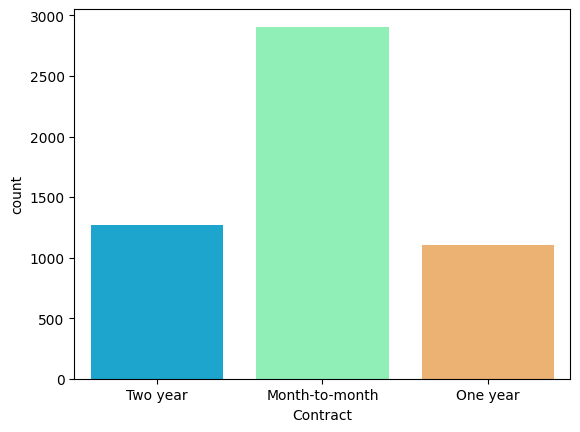

In [14]:
df['Contract'].value_counts(normalize=True)
sns.countplot(x=df['Contract'],data=df,palette = 'rainbow')

<Axes: xlabel='Contract', ylabel='count'>

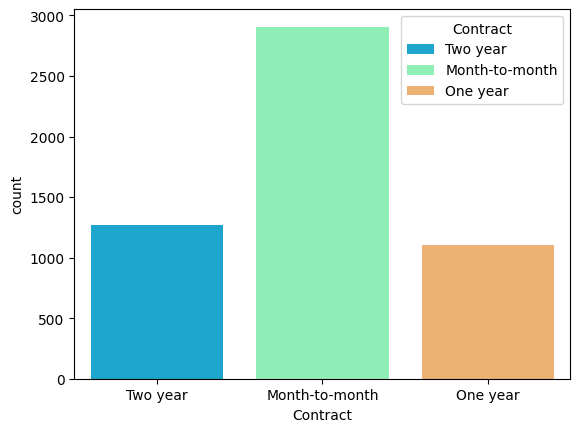

In [15]:
# Or you can go this way
sns.countplot(x='Contract', data=df, palette='rainbow', hue='Contract', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

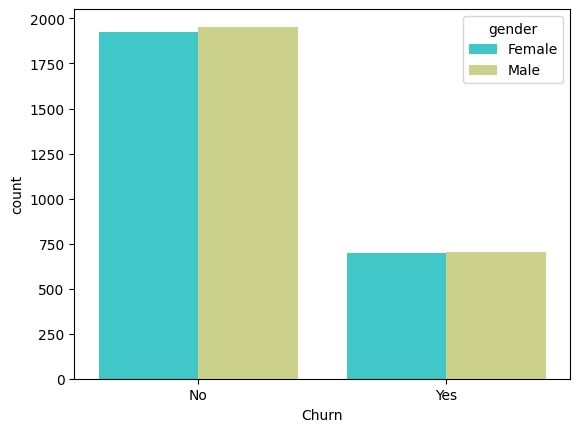

In [16]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='gender', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

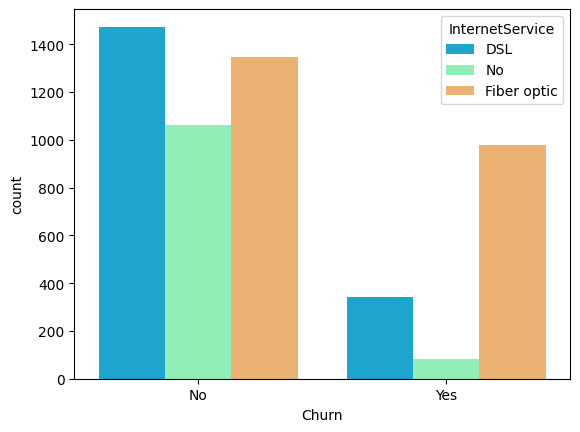

In [17]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='InternetService', legend=True)

In [18]:
# Most of the ones churning out are not the ones with no-internet-service

<Axes: xlabel='Churn', ylabel='count'>

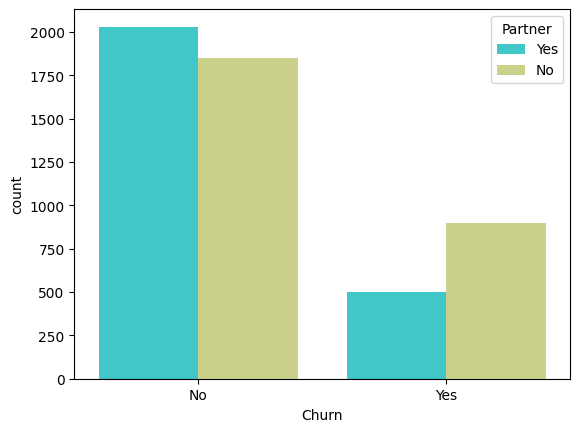

In [19]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='Partner', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

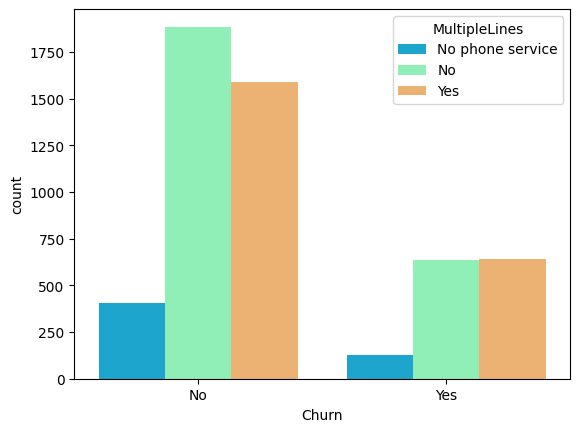

In [20]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='MultipleLines', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

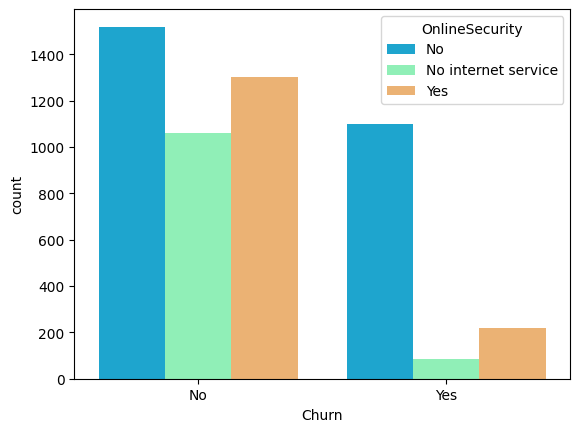

In [21]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='OnlineSecurity', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

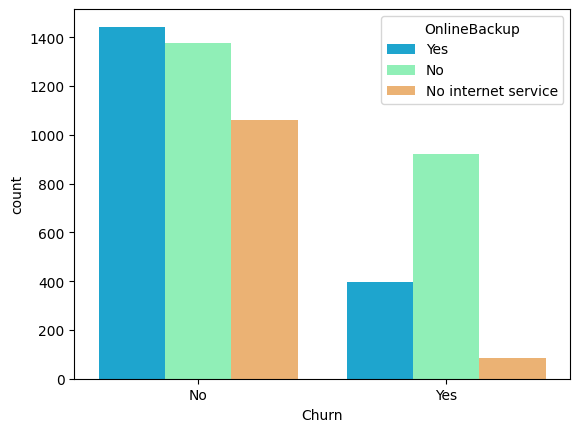

In [22]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='OnlineBackup', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

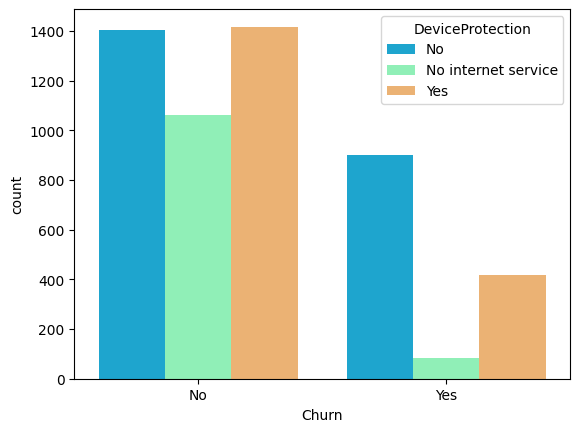

In [23]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='DeviceProtection', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

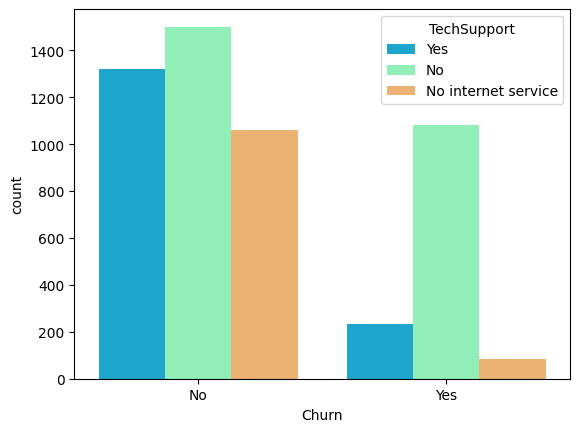

In [24]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='TechSupport', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

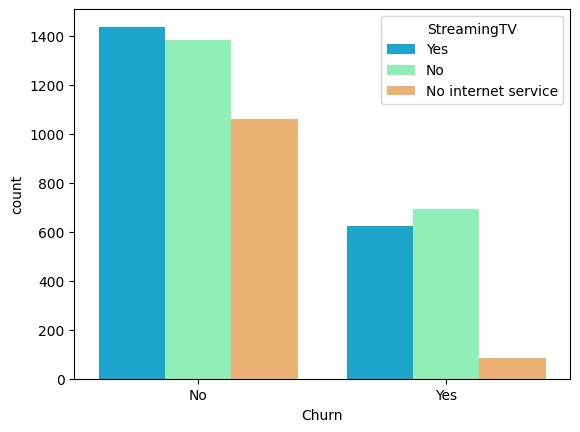

In [25]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='StreamingTV', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

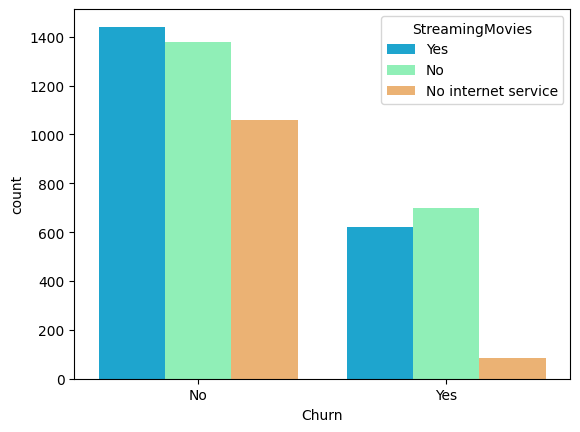

In [26]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='StreamingMovies', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

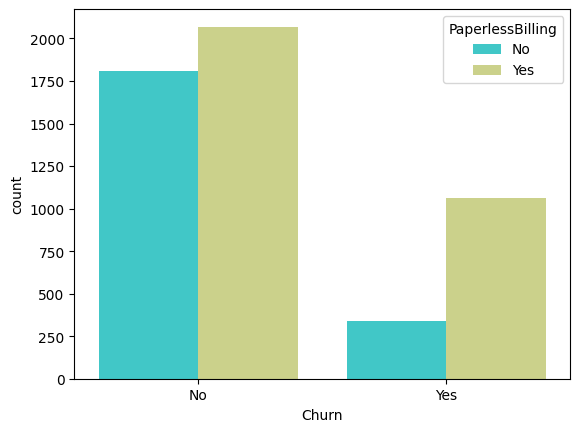

In [27]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='PaperlessBilling', legend=True)

<Axes: xlabel='Churn', ylabel='count'>

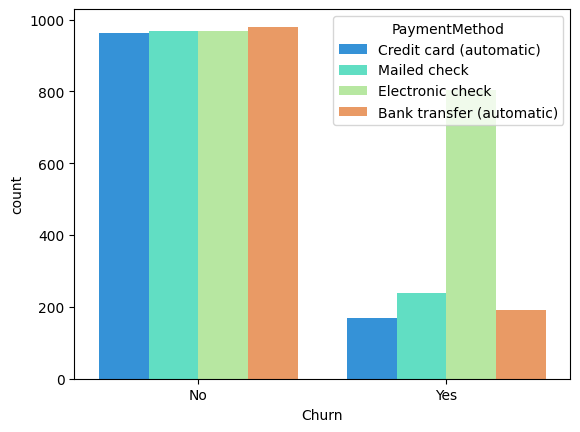

In [28]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='PaymentMethod', legend=True)

In [29]:
pd.crosstab(df['PaymentMethod'],df['Churn'],margins=True,normalize=True)
# The resulting cross_tab DataFrame will provide a summary of how 'PaymentMethod' and 'Churn' are related, showing both counts and proportions. 
# It helps you understand the distribution of churn with respect to different payment methods.

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),0.185536,0.036161,0.221696
Credit card (automatic),0.182317,0.031995,0.214313
Electronic check,0.183264,0.152215,0.335479
Mailed check,0.183453,0.045059,0.228512
All,0.734570,0.265430,1.000000


In [30]:
#People churing out are mostly using electronic check

<Axes: xlabel='Churn', ylabel='count'>

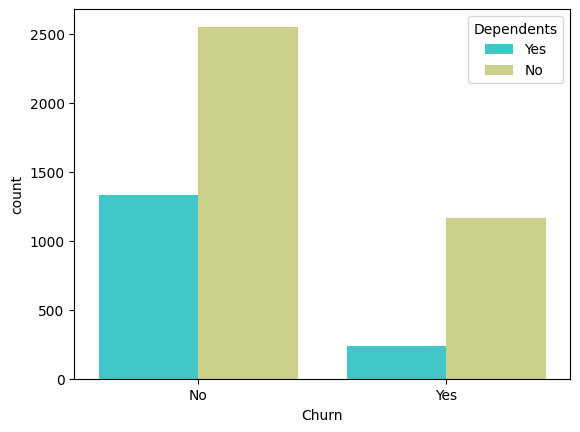

In [31]:
sns.countplot(x='Churn', data=df, palette='rainbow', hue='Dependents', legend=True)

In [32]:
# Most people churning out don't have dependents

<Axes: >

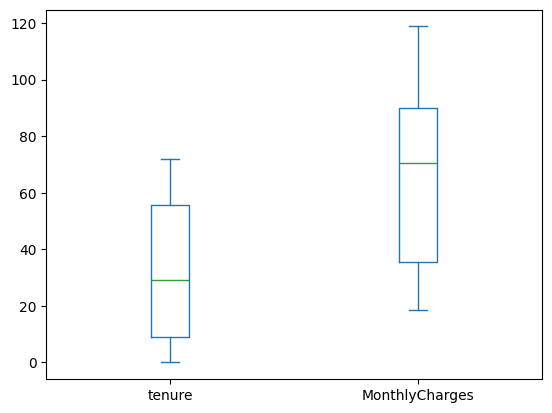

In [33]:
df[['tenure','MonthlyCharges']].plot.box()

 There are no outliers here for both the continuous data

In [34]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
#we see there's an error which says can't convert ' ' to float
#Let's check how many rows have such entries
df[df['TotalCharges']==' ']
#If there aren't many we may drop all the entries rows with single space


In [35]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)
# we are replacing empty space data with numpy's nan
df.dropna(subset=['TotalCharges'], inplace=True)
# then we dropped the nan data
df.reset_index(drop=True, inplace=True)
# Then we reset the index so that there are no empty sequences in between

In [36]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [37]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5274 non-null   object 
 1   gender            5274 non-null   object 
 2   SeniorCitizen     5274 non-null   object 
 3   Partner           5274 non-null   object 
 4   Dependents        5274 non-null   object 
 5   tenure            5274 non-null   int64  
 6   PhoneService      5274 non-null   object 
 7   MultipleLines     5274 non-null   object 
 8   InternetService   5274 non-null   object 
 9   OnlineSecurity    5274 non-null   object 
 10  OnlineBackup      5274 non-null   object 
 11  DeviceProtection  5274 non-null   object 
 12  TechSupport       5274 non-null   object 
 13  StreamingTV       5274 non-null   object 
 14  StreamingMovies   5274 non-null   object 
 15  Contract          5274 non-null   object 
 16  PaperlessBilling  5274 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,No,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,No
1,5175-AOBHI,Female,No,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,Yes
2,6922-NCEDI,Male,No,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,No
3,3143-ILDAL,Male,No,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,Yes
4,0872-NXJYS,Female,No,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,Yes


In [38]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5274.000000,5274.000000,5274.000000
mean,32.412021,64.891524,2295.560343
std,24.613992,30.171427,2285.155724
min,1.000000,18.400000,18.850000
25%,9.000000,35.500000,395.162500
50%,29.000000,70.500000,1387.400000
75%,56.000000,90.000000,3847.062500
max,72.000000,118.750000,8684.800000


<Axes: >

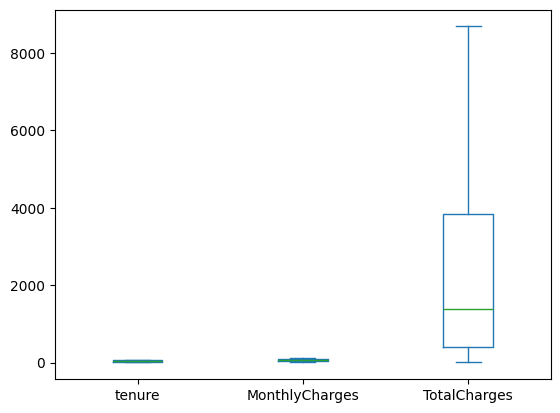

In [39]:
df[['tenure','MonthlyCharges','TotalCharges']].plot.box()

In [40]:
# Scaling the data
df['TotalCharges'] = df['TotalCharges']/100

<Axes: >

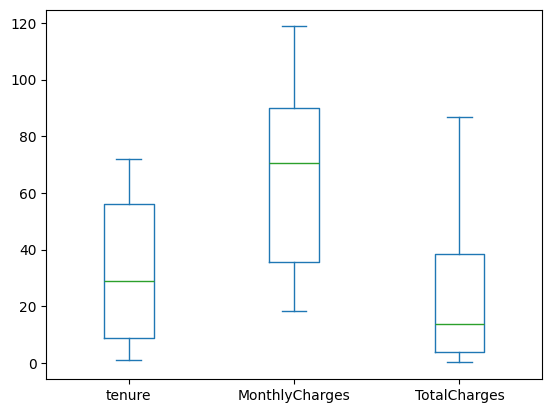

In [41]:
df[['tenure','MonthlyCharges','TotalCharges']].plot.box()

### Feature Engineering

1. Create new features that might help improve the model.
2. Select relevant features based on statistical tests.
3. Remove duplicates

In [42]:
# Checking for number of duplicate rows
dups = df.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


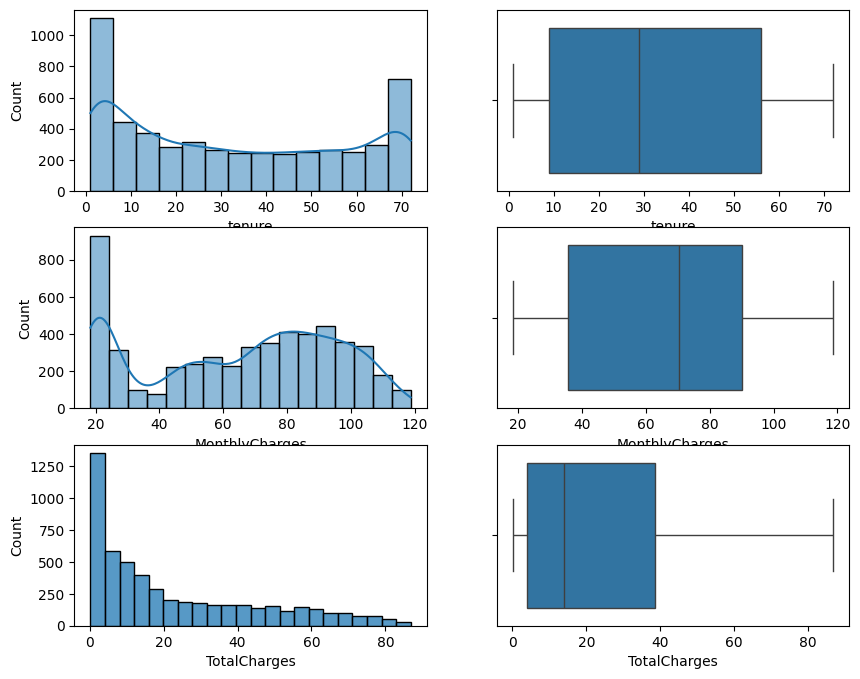

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot the histogram and boxplot for 'tenure'
sns.histplot(df['tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='tenure', data=df, ax=axes[0][1])

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df, ax=axes[2][1])

# Show the plots
plt.show()
#ax=axes[x][y] tells its position when displayed - like axes[0][0] is the 1st row 1st column axes[0][1] is 1st row 2nd column
# In the context of data visualization and statistics, "KDE" stands for Kernel Density Estimation. 
# Kernel Density Estimation is a non-parametric way to estimate the probability density function of a continuous random variable. 
#It is used to visualize the distribution of data in a smooth and continuous manner, 
# providing a smoother representation of the data's underlying probability density compared to traditional histograms.
# KDE plots are particularly useful when you want to understand the underlying shape of a distribution and identify modes or peaks in the data. 
# They can be a valuable tool for data exploration and analysis.

In [44]:
# Clearly no outliers

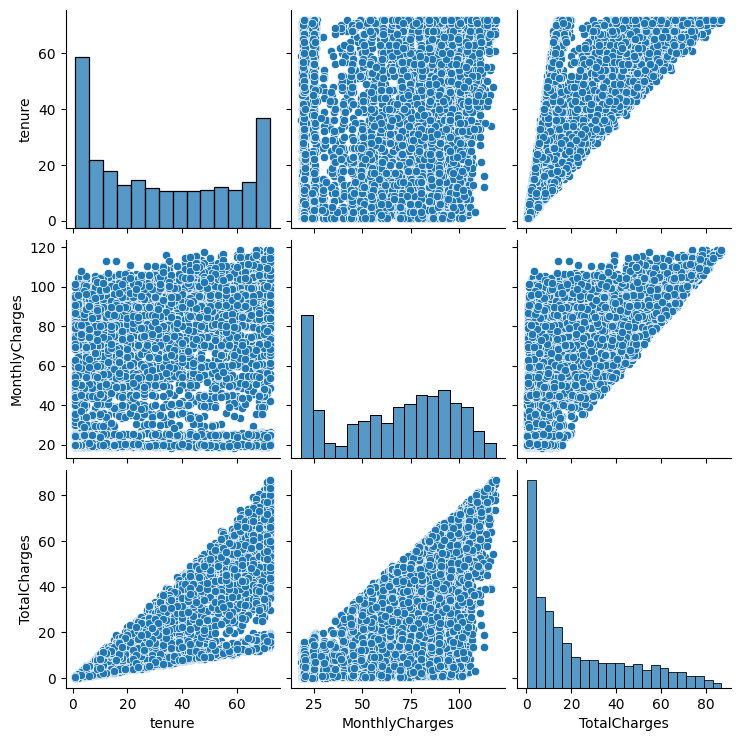

In [45]:
sns.pairplot(df)

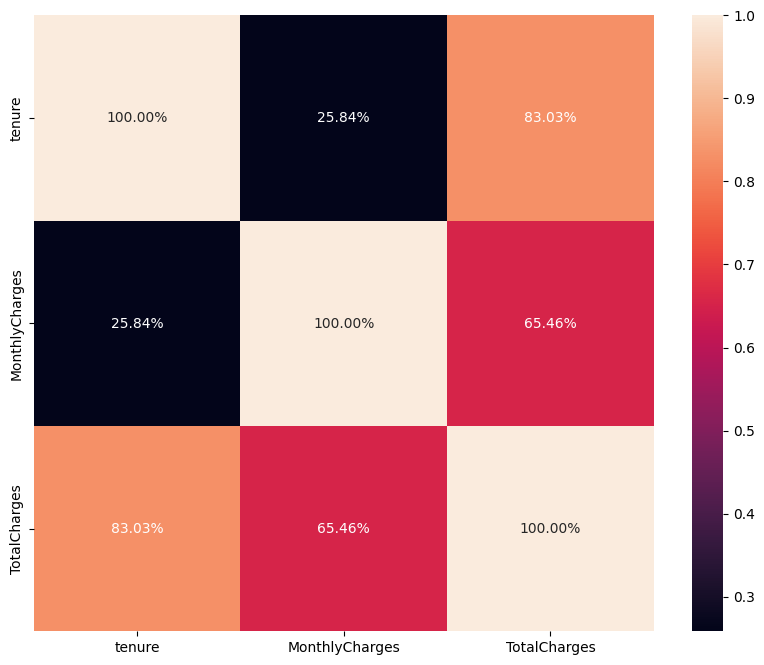

In [46]:
#Correlation matrix using heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
# By importing numpy as np, you can use np.number to correctly identify numeric data types when selecting columns from your DataFrame.
# Create a figure and specify the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a correlation matrix heatmap with annotations and a specific format for the annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2%")

# Show the heatmap
plt.show()


In [47]:
# Tenure and total charges & monthly charges and total charges are highly correlated

## Data preparation (scaling & outlier treatment)

In [48]:
#Scaling
# First we'll segragate the numerical and categorical data into individual dataframes and then scale the numerical ones
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [49]:
# Nethod 1 - Using z score for standardisation/scaling
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [50]:
data_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,1.608505,-0.372624,0.651413
1,-1.154413,-0.626199,-0.919920
2,0.958407,-1.448247,-0.462555
3,0.958407,0.979777,1.238125
4,-0.951257,0.485886,-0.688054


In [51]:
data_scaled.describe()

,tenure,MonthlyCharges,TotalCharges
count,5.274000e+03,5.274000e+03,5.274000e+03
mean,5.658475e-17,8.908729e-17,1.050860e-16
std,1.000095e+00,1.000095e+00,1.000095e+00
min,-1.276307e+00,-1.541058e+00,-9.963987e-01
25%,-9.512574e-01,-9.742433e-01,-8.317061e-01
50%,-1.386343e-01,1.859046e-01,-3.974549e-01
75%,9.584067e-01,8.322727e-01,6.790125e-01
max,1.608505e+00,1.785251e+00,2.796241e+00


<Axes: xlabel='TotalCharges', ylabel='Count'>

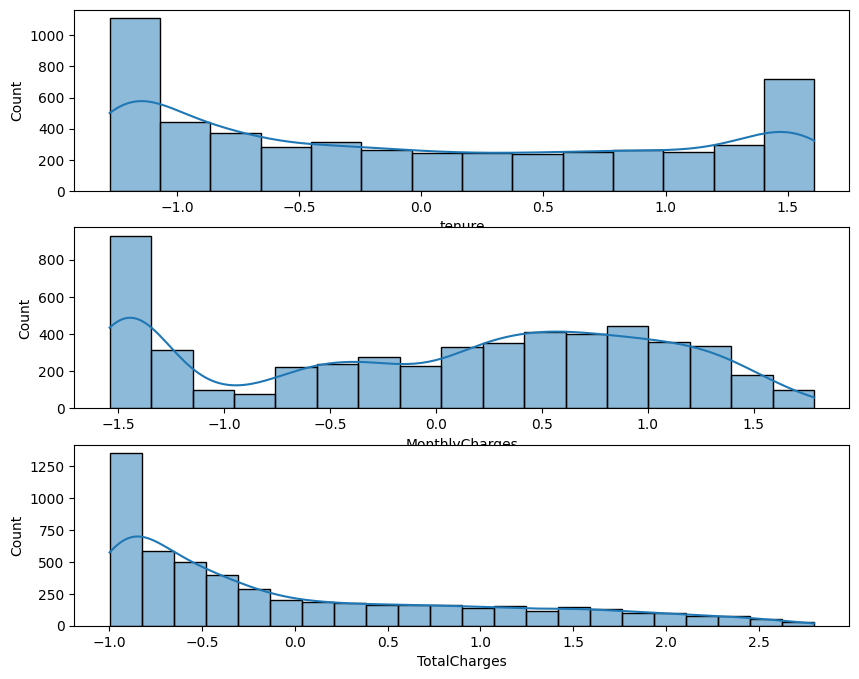

In [52]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(10,8))
sns.histplot(data_scaled['tenure'],kde=True,ax=axes[0])
sns.histplot(data_scaled['MonthlyCharges'],kde=True,ax=axes[1])
sns.histplot(data_scaled['TotalCharges'],kde=True,ax=axes[2])

In [53]:
# Method 2 - Using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[num])
data_standard = scaler.transform(df[num])
data_standard = pd.DataFrame(data_standard,columns=df[num].columns)
data_standard.head()

,tenure,MonthlyCharges,TotalCharges
0,1.608505,-0.372624,0.651413
1,-1.154413,-0.626199,-0.919920
2,0.958407,-1.448247,-0.462555
3,0.958407,0.979777,1.238125
4,-0.951257,0.485886,-0.688054


In [54]:
# Method 3 - MinMax method - after scaling all values lie between zero and one
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(df[num])
data_minmax = Scaler.transform(df[num])
data_minmax = pd.DataFrame(data_minmax,columns=df[num].columns)
data_minmax.head()

,tenure,MonthlyCharges,TotalCharges
0,1.000000,0.351271,0.434476
1,0.042254,0.275037,0.020165
2,0.774648,0.027902,0.140758
3,0.774648,0.757848,0.589174
4,0.112676,0.609367,0.081301


In [55]:
# first we'll check for skewness and kurtosid which must lie between -1 and 1
print('The skewness for tenure is ',df['tenure'].skew())
print('The skewness for Monthly Charges is ',df['MonthlyCharges'].skew())
print('The skewness for Total Charges is ',df['TotalCharges'].skew())
print('The kurtosis for tenure is ',df['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df['MonthlyCharges'].kurtosis())
print('The kurtosis for Total Charges is ',df['TotalCharges'].kurtosis())

The skewness for tenure is  0.24238749110502886
The skewness for Monthly Charges is  -0.22069489393996322
The skewness for Total Charges is  0.9517662445097254
The kurtosis for tenure is  -1.3885043581171552
The kurtosis for Monthly Charges is  -1.2634997635967198
The kurtosis for Total Charges is  -0.26373908548816294


Skewness:

Skewness measures the asymmetry of the data distribution. A distribution can be positively skewed, negatively skewed, or have zero skew.

Positive Skew: If the tail on the right side of the distribution is longer or fatter than the left side, the distribution is positively skewed. In a positively skewed distribution, the mean is typically greater than the median.

Negative Skew: If the tail on the left side of the distribution is longer or fatter than the right side, the distribution is negatively skewed. In a negatively skewed distribution, the mean is typically less than the median.

Zero Skew: A skewness value of zero indicates a perfectly symmetrical distribution where the mean and median are equal, and the data is evenly distributed around the center.

Ideal Skewness Values:

For most practical purposes, skewness between -1 and 1 is considered acceptable. Values within this range indicate a reasonably symmetrical distribution.
Skewness values less than -1 or greater than 1 suggest moderate to high skewness and indicate a departure from symmetry.
Kurtosis:

Kurtosis measures the tail behavior of the distribution, specifically how the tails compare to a normal distribution.

Leptokurtic (Positive Kurtosis): A leptokurtic distribution has fatter tails and a sharper peak (higher central peak) than a normal distribution. It indicates a high probability of extreme values in the tails.

Platykurtic (Negative Kurtosis): A platykurtic distribution has thinner tails and a flatter peak (lower central peak) than a normal distribution. It indicates a low probability of extreme values in the tails.

Mesokurtic (Normal Kurtosis): A mesokurtic distribution has kurtosis equal to that of a normal distribution.

Ideal Kurtosis Values:

A kurtosis value of 3 indicates a mesokurtic distribution, which is similar to a normal distribution.
A kurtosis value greater than 3 indicates leptokurtic (heavy-tailed) behavior.
A kurtosis value less than 3 indicates platykurtic (light-tailed) behavior.

In [56]:
# The range of skenwss and kurtosis is well within the expected hence transformation isn't needed much as such

### Model Building

1. Split the `train.csv` data into training and validation sets.
2. Try different algorithms like Logistic Regression, Random Forest, and Gradient Boosting to train the model.
3. Tune hyperparameters for better performance.

We'll start with one hot encoding

In [57]:
#we can drop the customer id column before creating dummies
#because dummies are not needed for data analysis and prediction
df=df.drop('customerID', axis=1)

In [58]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5274,5274,5274,5274,5274.000000,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274.000000,5274.000000,5274
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,2653,4418,2748,3713,NaN,4746,2517,2323,2617,2299,2304,2585,2075,2073,2907,3130,1772,NaN,NaN,3872
mean,NaN,NaN,NaN,NaN,32.412021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.891524,22.955603,NaN
std,NaN,NaN,NaN,NaN,24.613992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.171427,22.851557,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,0.188500,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,3.951625,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.500000,13.874000,NaN
75%,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,38.470625,NaN


In [59]:
for column in df.columns :
    if df[column].dtype=='object' :
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')

GENDER :  2
gender
Female    0.496966
Male      0.503034
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162306
No     0.837694
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.478953
No     0.521047
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.29598
No     0.70402
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.100114
Yes    0.899886
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.100114
Yes                 0.422639
No                  0.477247
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.215965
DSL            0.343572
Fiber optic    0.440463
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.215965
Yes                    0.287827
No                     0.496208
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.215965
Ye

In [60]:
#correlation plots
df[num].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.258372,0.830254
MonthlyCharges,0.258372,1.000000,0.654620
TotalCharges,0.830254,0.654620,1.000000


What we get here is pearson correlation coefficient
Pearson Correlation (r):
r = 1: Perfect positive correlation
0.7 ≤ |r| < 1: Strong positive correlation
0.4 ≤ |r| < 0.7: Moderate positive correlation
0.2 ≤ |r| < 0.4: Weak positive correlation
|r| < 0.2: Very weak or no correlation

In [61]:
# Also we'll now get dummies 
df = pd.get_dummies(df,drop_first=True)

In [62]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5274 non-null   int64  
 1   MonthlyCharges                         5274 non-null   float64
 2   TotalCharges                           5274 non-null   float64
 3   gender_Male                            5274 non-null   bool   
 4   SeniorCitizen_Yes                      5274 non-null   bool   
 5   Partner_Yes                            5274 non-null   bool   
 6   Dependents_Yes                         5274 non-null   bool   
 7   PhoneService_Yes                       5274 non-null   bool   
 8   MultipleLines_No phone service         5274 non-null   bool   
 9   MultipleLines_Yes                      5274 non-null   bool   
 10  InternetService_Fiber optic            5274 non-null   bool   
 11  Inte

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,72,53.65,37.8400,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,False
1,4,46.00,1.9360,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
2,56,21.20,12.3865,True,False,False,True,True,False,False,...,False,True,False,True,False,True,False,False,True,False
3,56,94.45,51.2460,True,False,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,True
4,9,79.55,7.2340,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,True


In [63]:
df.to_csv('need_only_data.csv', index = False)
# To export our datset to another csv file

# Prediction using Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
y = df['Churn_Yes']
X = df.drop(['Churn_Yes','TotalCharges'], axis=1)
# dropping the Total charges column because it is highly correlated with both the other parameters tenure and TotalCharges

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)
# test size is percent of dataset used for testing, rest is uesd for traing
# Random_state=50 is ised to replicate the same result using the same testing and training dataset.
# Without this training and testing dataset change every time we use train_test_split.
# stratify = y is used to compute for y.

In [67]:
# Creating Instance
model = LogisticRegression(max_iter=10000)
# fit instance for training data
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [68]:
model.intercept_

array([-0.52564788])

In [69]:
Prediction_test = model.predict(X_test)

In [70]:
Prediction_test

array([ True, False, False, ..., False, False, False])

In [71]:
Prediction_train = model.predict(X_train)

In [72]:
Prediction_train

array([ True, False,  True, ..., False, False, False])

In [73]:
#To check the performance

# Recall value is the success rate over the binary value of 1 - or yes, this different from accuracy
# Selecting the right sample if of utmost importance for binary prediction
from sklearn.metrics import classification_report
print('\nClassification report of test data')
print(classification_report(y_test,Prediction_test))
from sklearn.metrics import confusion_matrix
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, Prediction_test))
print('\nClassification report of train data')
print(classification_report(y_train,Prediction_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, Prediction_train))


Classification report of test data
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1162
        True       0.66      0.55      0.60       421

    accuracy                           0.80      1583
   macro avg       0.75      0.72      0.73      1583
weighted avg       0.80      0.80      0.80      1583


Confusion matrix for test data
[[1040  122]
 [ 189  232]]

Classification report of train data
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      2710
        True       0.65      0.55      0.60       981

    accuracy                           0.80      3691
   macro avg       0.75      0.72      0.73      3691
weighted avg       0.80      0.80      0.80      3691


Confusion matrix for train data
[[2423  287]
 [ 438  543]]


# Prediction using Decision trees

In [74]:
#Importing Deciosn Tree
from sklearn.tree import DecisionTreeClassifier
# Intitializing decision tree
dt_model = DecisionTreeClassifier(criterion='gini')

In [75]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
#To visualize the decision tree 
#from sklearn import tree
#train_char_label = ['No','Yes']
#Id_tree_file = open('Id_tree_file.dot','w')
#dot_data = tree.export_graphviz(dt_model,
#                               out_file=Id_tree_file,
 #                              feature_names = list(X_train),
  #                             class_names = list(train_char_label))
#Id_tree_file.close()

In [77]:
# Variable importance

In [78]:
pd.DataFrame(dt_model.feature_importances_).head()

,0
0,0.285680
1,0.279171
2,0.029338
3,0.018318
4,0.026020


In [79]:
pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False)

,Imp
tenure,0.285680
MonthlyCharges,0.279171
InternetService_Fiber optic,0.107421
gender_Male,0.029338
Partner_Yes,0.026020
Dependents_Yes,0.025667
PaperlessBilling_Yes,0.022709
TechSupport_Yes,0.020663
PaymentMethod_Electronic check,0.020552
OnlineSecurity_Yes,0.020277


In [80]:
#Predictions
# On training data
y_pred_train = dt_model.predict(X_train)

In [81]:
y_pred_train

array([ True,  True,  True, ...,  True, False, False])

In [82]:
# On testing data
y_pred_test = dt_model.predict(X_test)

In [83]:
y_pred_test

array([ True, False, False, ..., False, False, False])

In [84]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2710
        True       1.00      0.99      1.00       981

    accuracy                           1.00      3691
   macro avg       1.00      1.00      1.00      3691
weighted avg       1.00      1.00      1.00      3691


Confusion matrix for train data
[[2710    0]
 [   6  975]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1162
        True       0.48      0.51      0.50       421

    accuracy                           0.72      1583
   macro avg       0.65      0.66      0.65      1583
weighted avg       0.73      0.72      0.73      1583


Confusion matrix for test data
[[930 232]
 [206 215]]


# Predictions using Random Forest Method

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rdf_model = RandomForestClassifier(n_estimators = 400, max_features=40,random_state=50)

In [87]:
rdf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=40, n_estimators=400, random_state=50)

In [88]:
y_pred_rdf_train = rdf_model.predict(X_train)

In [89]:
y_pred_rdf_train

array([ True,  True,  True, ...,  True, False, False])

In [90]:
y_pred_rdf_test = rdf_model.predict(X_test)

In [91]:
y_pred_rdf_test

array([ True, False, False, ..., False,  True, False])

In [92]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_rdf_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_rdf_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_rdf_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_rdf_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2710
        True       1.00      1.00      1.00       981

    accuracy                           1.00      3691
   macro avg       1.00      1.00      1.00      3691
weighted avg       1.00      1.00      1.00      3691


Confusion matrix for train data
[[2708    2]
 [   4  977]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1162
        True       0.61      0.48      0.53       421

    accuracy                           0.78      1583
   macro avg       0.72      0.68      0.69      1583
weighted avg       0.77      0.78      0.77      1583


Confusion matrix for test data
[[1034  128]
 [ 221  200]]


# Now we'll proceed to do the feature engineering in the set we have to predict

In [93]:
df1 = pd.read_csv('active_customers.csv')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [95]:
# Replace values in the 'SeniorCitizen' column
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [96]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [97]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [98]:
df1[df1['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
74,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
252,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
814,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [99]:
df1['TotalCharges'].replace(' ', np.nan, inplace=True)
df1.dropna(subset=['TotalCharges'], inplace=True)
df1.reset_index(drop=True, inplace=True)

In [100]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1758 non-null   object 
 1   gender            1758 non-null   object 
 2   SeniorCitizen     1758 non-null   object 
 3   Partner           1758 non-null   object 
 4   Dependents        1758 non-null   object 
 5   tenure            1758 non-null   int64  
 6   PhoneService      1758 non-null   object 
 7   MultipleLines     1758 non-null   object 
 8   InternetService   1758 non-null   object 
 9   OnlineSecurity    1758 non-null   object 
 10  OnlineBackup      1758 non-null   object 
 11  DeviceProtection  1758 non-null   object 
 12  TechSupport       1758 non-null   object 
 13  StreamingTV       1758 non-null   object 
 14  StreamingMovies   1758 non-null   object 
 15  Contract          1758 non-null   object 
 16  PaperlessBilling  1758 non-null   object 


In [102]:
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,1758.000000,1758.000000,1758.000000
mean,32.451081,64.518259,2246.520734
std,24.344839,29.834930,2210.932852
min,1.000000,18.250000,18.800000
25%,9.000000,35.825000,418.525000
50%,29.000000,69.950000,1423.500000
75%,55.000000,89.600000,3576.012500
max,72.000000,116.800000,8496.700000


<Axes: >

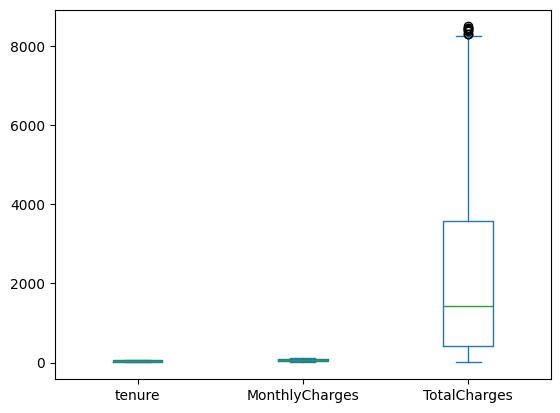

In [103]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

Scaling the data

In [104]:
df1['TotalCharges'] = df1['TotalCharges']/100

<Axes: >

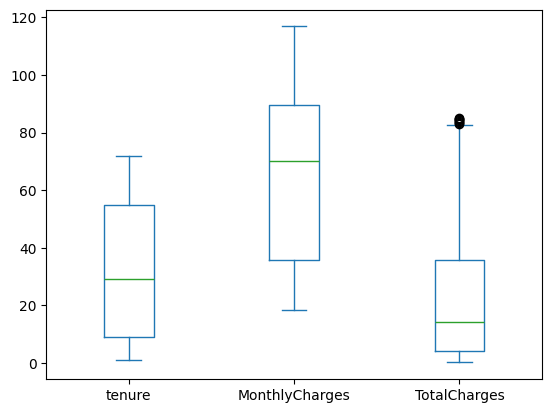

In [105]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

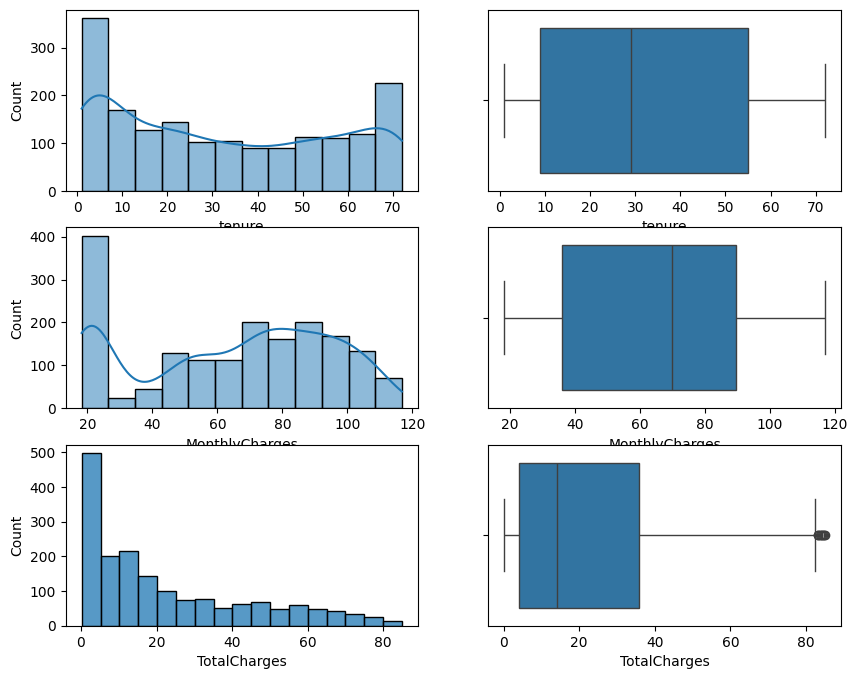

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot the histogram and boxplot for 'tenure'
sns.histplot(df1['tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='tenure', data=df1, ax=axes[0][1])

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df1['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df1, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df1['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df1, ax=axes[2][1])

# Show the plots
plt.show()

In [107]:
# Outlier treatment for total charges is needed
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [108]:
column = 'TotalCharges'  # Replace with your column name
lr, ur = remove_outlier(df1[column])

# Update the column values
df1[column] = np.where(df1[column] > ur, ur, df1[column])
df1[column] = np.where(df1[column] < lr, lr, df1[column])

<Axes: >

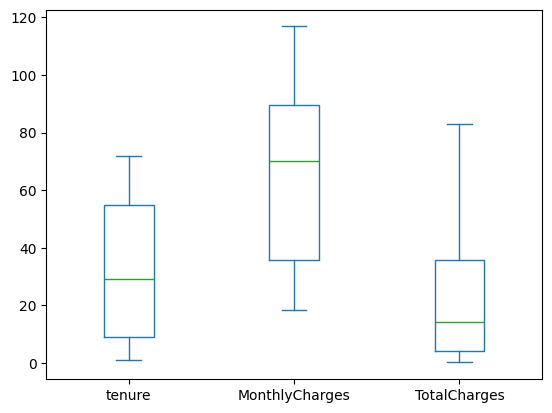

In [109]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

 No outliers now

In [110]:
# Checking for number of duplicate rows
dups = df1.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


In [111]:
print('The skewness for tenure is ',df1['tenure'].skew())
print('The skewness for Monthly Charges is ',df1['MonthlyCharges'].skew())
print('The skewness for Total Charges is ',df1['TotalCharges'].skew())
print('The kurtosis for tenure is ',df1['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df1['MonthlyCharges'].kurtosis())
print('The kurtosis for Total Charges is ',df1['TotalCharges'].kurtosis())

The skewness for tenure is  0.2235291524502344
The skewness for Monthly Charges is  -0.22732384861650706
The skewness for Total Charges is  0.9887964154480428
The kurtosis for tenure is  -1.3867144777985678
The kurtosis for Monthly Charges is  -1.2341619949036984
The kurtosis for Total Charges is  -0.14299644260780164


In [112]:
seq = df1['customerID']
# So that we concatenate the id with results since the order remains same

In [113]:
df1=df1.drop('customerID', axis=1)

In [114]:
for column in df1.columns :
    if df1[column].dtype=='object' :
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts(normalize=True).sort_values())
        print('\n')

GENDER :  2
gender
Female    0.49033
Male      0.50967
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162685
No     0.837315
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.493174
No     0.506826
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.30603
No     0.69397
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.086462
Yes    0.913538
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.086462
Yes                 0.419795
No                  0.493743
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.216724
DSL            0.343572
Fiber optic    0.439704
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.216724
Yes                    0.282708
No                     0.500569
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.216724
Yes 

In [115]:
# No bad data

In [116]:
# First we'll segragate the numerical and categorical data into individual dataframes and then scale the numerical ones
cat1=[]
num1=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        cat1.append(i)
    else:
        num1.append(i)
print(cat1)
print(num1)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


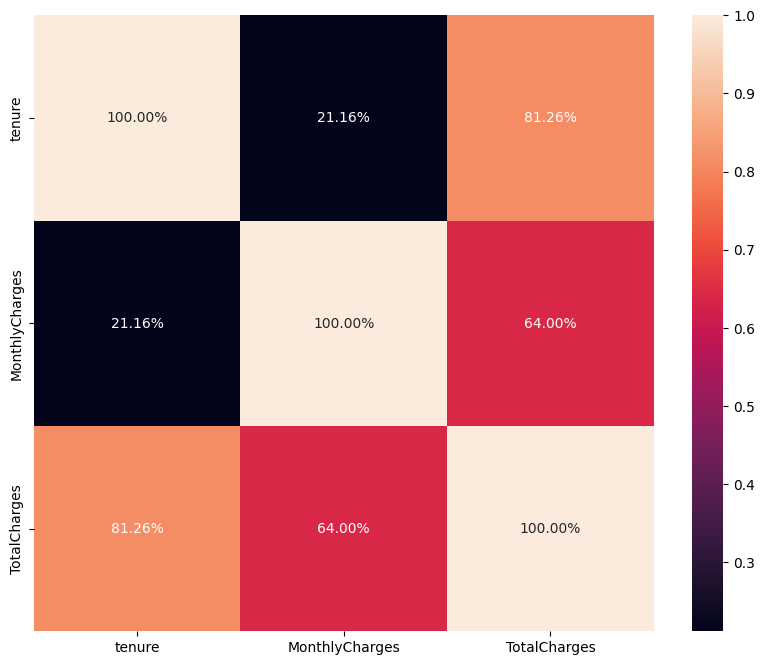

In [117]:
# Create a figure and specify the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a correlation matrix heatmap with annotations and a specific format for the annotations
sns.heatmap(df1[num1].corr(), annot=True, fmt=".2%")

# Show the heatmap
plt.show()

Since TotalCharges is highly correlated with other two parameters we'll drop it for further analysis.

In [118]:
df1=df1.drop('TotalCharges',axis=1)

In [119]:
df1.to_csv('need_only_data1.csv', index = False)
# To export our datset to another csv file

In [120]:
# We'll now get dummies
df1 = pd.get_dummies(df1,drop_first=True)

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 1758 non-null   int64  
 1   MonthlyCharges                         1758 non-null   float64
 2   gender_Male                            1758 non-null   bool   
 3   SeniorCitizen_Yes                      1758 non-null   bool   
 4   Partner_Yes                            1758 non-null   bool   
 5   Dependents_Yes                         1758 non-null   bool   
 6   PhoneService_Yes                       1758 non-null   bool   
 7   MultipleLines_No phone service         1758 non-null   bool   
 8   MultipleLines_Yes                      1758 non-null   bool   
 9   InternetService_Fiber optic            1758 non-null   bool   
 10  InternetService_No                     1758 non-null   bool   
 11  Onli

# Prediction using Logistic Regression

In [122]:
prediction_LR = model.predict(df1)
for index, prediction in enumerate(prediction_LR):
    print(f"Row {index}: Prediction = {prediction}")


Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = True
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction =

# Prediction using Decision Tree Algorithm

In [123]:
prediction_DT = dt_model.predict(df1)
for index, prediction in enumerate(prediction_DT):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = True
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = True
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = True
Row 30: Prediction = False
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = False
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction =

# Prediction using Random Forest Algorithm

In [124]:
prediction_RDF = rdf_model.predict(df1)
for index, prediction in enumerate(prediction_RDF):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = False
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = True
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = False
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction 

# Combining the data and exporting it 

In [129]:
Fincal_file = []

In [133]:
# Create a DataFrame by combining the lists
Final_file = {'Customer_Id': seq, 'prediction_RDF': prediction_RDF, 'prediction_DT': prediction_DT, 'prediction_LR': prediction_LR}
result_df = pd.DataFrame(Final_file)
# Exporting the DataFrame to a CSV file
result_df.to_csv('result1.csv', index=False)


In [1]:
jupyter nbconvert --to pdf your_notebook.ipynb


SyntaxError: invalid syntax (1738622736.py, line 1)